/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

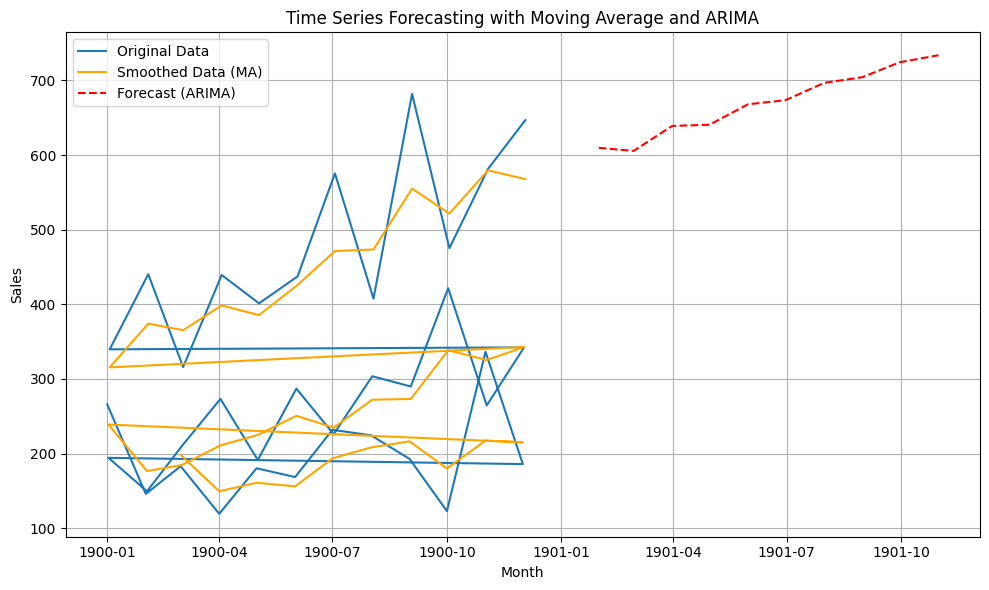

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv")

# Clean and prepare data
df.columns = ['Month', 'Sales']
df = df.dropna()
df['Month'] = pd.to_datetime(df['Month'], format='%d-%b', errors='coerce')

df.set_index('Month', inplace=True)
ts = df['Sales']

# Apply Moving Average Smoothing
ts_smoothed = ts.rolling(window=3).mean().dropna()

# Fit ARIMA model on smoothed data
model = ARIMA(ts_smoothed, order=(2, 1, 2))
model_fit = model.fit()

# Forecast next 10 values
forecast = model_fit.forecast(steps=10)

# Plot original, smoothed, and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(ts_smoothed, label='Smoothed Data (MA)', color='orange')
plt.plot(pd.date_range(start=ts_smoothed.index[-1], periods=11, freq='M')[1:], forecast,
         label='Forecast (ARIMA)', color='red', linestyle='--')
plt.title('Time Series Forecasting with Moving Average and ARIMA')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


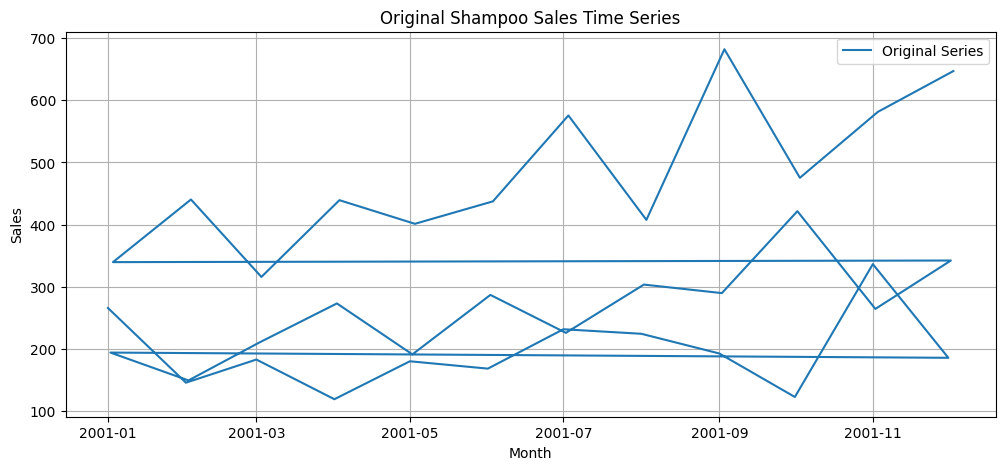

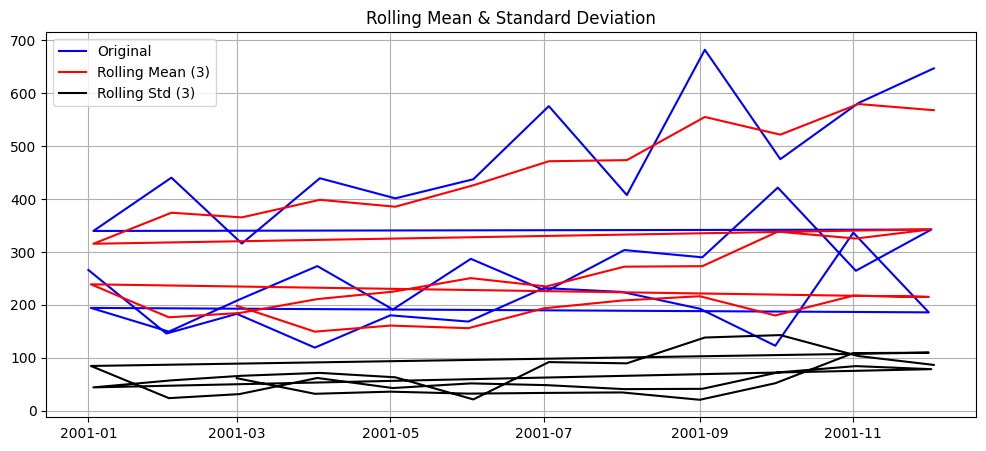

== ADF Test on Original Series ==
ADF Statistic: 3.060142083641181
p-value: 1.0
Critical Value (1%): -3.7238633119999998
Critical Value (5%): -2.98648896
Critical Value (10%): -2.6328004


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
file_path = "sales-of-shampoo-over-a-three-ye.csv"
df = pd.read_csv(file_path)
df = df.dropna()
df['Month'] = pd.to_datetime(df['Month'], format='%d-%b-%Y')
df.set_index('Month', inplace=True)
ts = df['Sales']
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Original Series')
plt.title('Original Shampoo Sales Time Series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
rolmean = ts.rolling(window=3).mean()
rolstd = ts.rolling(window=3).std()
plt.figure(figsize=(12, 5))
plt.plot(ts, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean (3)')
plt.plot(rolstd, color='black', label='Rolling Std (3)')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()
print("== ADF Test on Original Series ==")
adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")
